# Portfolio Part 3 - Analysis of Mobile Price Data (2024 S1)

|Column|Meaning|
|:-----:|:-----:|
|battery power|Total energy a battery can store in one time measured in mAh|
|blue|Has bluetooth or not|
|clock speed|speed at which microprocessor executes instructions|
|dual sim|Has dual sim support or not|
|fc|Front Camera mega pixels|
|four g|Has 4G or not|
|int memory|Internal Memory in Gigabytes|
|m dep|Mobile Depth in cm|
|mobile wt|Weight of mobile phone|
|n cores|Number of cores of processor|
|pc|Primary Camera mega pixels|
|px height|Pixel Resolution Height|
|px width|Pixel Resolution Width|
|ram|Random Access Memory in Mega Bytes|
|sc h|Screen Height of mobile in cm|
|sc w|Screen Width of mobile in cm|
|talk time|longest time that a single battery charge will last when you are|
|three g|Has 3G or not|
|touch screen|Has touch screen or not|
|wifi|Has wifi or not|
|price range|This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost)|

In this Portfolio task, you will work on a new dataset named 'Mobile Price Data', it contains numerous details about mobile phone hardware, specifications, and prices. Your main task is to train classification models to predict **mobile phone prices** ('price range' in the dataset)and evaluate the strengths and weaknesses of these models.

Here's the explanation of each column:

Blue, dual sim, four g, three g, touch screen, and wifi are all binary attributes, 0 for not and 1 for yes.

Your high level goal in this notebook is to build and evaluate predictive models for 'price range' from other available features. More specifically, you need to **complete the following major steps**:

1. ***Explore the data*** and ***clean the data if necessary***. For example, remove abnormal instanaces and replace missing values.

2. ***Study the correlation*** between 'price range' with other features. And ***select the variables*** that you think are helpful for predicting the price range. We do not limit the number of variables.

3. ***Split the dataset*** (Training set : Test set = 8 : 2)

4. ***Train a logistic regression model*** to predict 'price range' based on the selected features (from the second step). ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.) ***Explain your model and evaluate its performance*** (Is the model performing well? If yes, what factors might be contributing to the good performance of your model? If not, how can improvements be made?).

5. ***Train a KNN model*** to predict 'price range' based on the selected features (you can use the features selected from the second step and set K with an ad-hoc manner in this step. ***Calculate the accuracy*** of your model. (You are required to report the accuracy from both training set and test set.)

6. ***Tune the hyper-parameter K*** in KNN (Hints: GridsearchCV), ***visualize the results***, and ***explain*** how K influences the prediction performance.

  Hints for visualization: You can use line chart to visualize K and mean accuracy scores on test set.

Note 1: In this assignment, we no longer provide specific guidance and templates for each sub task. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: You will not being evaluated on the accuracy of the model but on the process that you use to generate it and your explanation.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### 1. Explore and Clean the Data

#### 1.1 Brief information about the data

In [2]:
# Set display width
pd.set_option('display.width', 1000)

# Load the data file and display the DataFrame:
df = pd.read_csv('Mobile_Price_Data.csv')
print("Length of the data: ", len(df))

print ('------------------------------------')

print ('The current DataFrame: ',"\n", df.head(5))

Length of the data:  2000
------------------------------------
The current DataFrame:  
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  talk_time  three_g  touch_screen  wifi  price_range
0            842     0          2.2         0   1       0         7.0    0.6        188        2  ...         20     756.0  2549.0     9     7         19      0.0             0     1            1
1           1021     1          0.5         1   0       1        53.0    0.7        136        3  ...        905    1988.0  2631.0    17     3          7      1.0             1     0            2
2            563     1          0.5         1   2       1        41.0    0.9        145        5  ...       1263    1716.0  2603.0    11     2          9      1.0             1     0            2
3            615     1          2.5         0   0       0        10.0    0.8        131        6  ...       1216    1786.0  276

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     1999 non-null   float64
 7   m_dep          1999 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       1999 non-null   float64
 13  ram            1999 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        1999 non-null   float64
 18  touch_sc

**From the above output, we can conclude and note that:**

* There are missing values in several columns: _int_memory, m_dep, px_width, ram, three_g_
* The features in our data frame are already in numeric forms.

First of all, for the missing values, we are going to drop the rows that have missing values in each column mentioned above. 

#### 1.2 Remove missing data

In [4]:
# Count number of Null values in each column:
print ('Number of Null values in each column: ', "\n", df.isna().sum())

print ('------------------------------------')
# The length of the DataFrame before removing the missing data aka Null values:
print ('The length of the DataFrame before removing the missing data: ', len(df))

# Remove records with missing data in columns, then save the cleaned DataFrame into a new DataFrame:
df_cleaned = df.dropna()
# The length of the DataFrame after removing the missing data aka Null values:
print ('The length of the DataFrame after removing the missing data: ', len(df_cleaned))

Number of Null values in each column:  
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       1
m_dep            1
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         1
ram              1
sc_h             0
sc_w             0
talk_time        0
three_g          1
touch_screen     0
wifi             0
price_range      0
dtype: int64
------------------------------------
The length of the DataFrame before removing the missing data:  2000
The length of the DataFrame after removing the missing data:  1995


#### 1.3 Summary of the cleaned DataFrame:

In [5]:
df_cleaned.describe().round(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1995.00,1995.0,1995.00,1995.00,1995.00,1995.00,1995.00,1995.00,1995.00,1995.00,...,1995.00,1995.00,1995.00,1995.00,1995.00,1995.00,1995.00,1995.0,1995.00,1995.00
mean,1238.37,0.5,1.52,0.51,4.31,0.52,32.03,0.50,140.25,4.52,...,644.71,1251.42,2124.92,12.30,5.76,11.03,0.76,0.5,0.51,1.50
std,439.15,0.5,0.82,0.50,4.33,0.50,18.14,0.29,35.39,2.29,...,443.96,432.41,1085.40,4.21,4.36,5.46,0.43,0.5,0.50,1.12
min,501.00,0.0,0.50,0.00,0.00,0.00,2.00,0.10,80.00,1.00,...,0.00,500.00,256.00,5.00,0.00,2.00,0.00,0.0,0.00,0.00
25%,852.00,0.0,0.70,0.00,1.00,0.00,16.00,0.20,109.00,3.00,...,282.00,874.50,1207.00,9.00,2.00,6.00,1.00,0.0,0.00,0.50
50%,1225.00,0.0,1.50,1.00,3.00,1.00,32.00,0.50,141.00,4.00,...,564.00,1247.00,2147.00,12.00,5.00,11.00,1.00,1.0,1.00,2.00
75%,1615.00,1.0,2.20,1.00,7.00,1.00,48.00,0.80,170.00,7.00,...,946.50,1633.00,3067.00,16.00,9.00,16.00,1.00,1.0,1.00,2.50
max,1998.00,1.0,3.00,1.00,19.00,1.00,64.00,1.00,200.00,8.00,...,1960.00,1998.00,3998.00,19.00,18.00,20.00,1.00,1.0,1.00,3.00


### 2. Study the correlation between 'price range' with other features

In [6]:
# Calculate correlation matrix
correlation_matrix = df_cleaned.corr()
correlation_matrix


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.013109,0.012529,-0.041212,0.033517,0.014471,-0.002742,0.034308,0.000132,-0.028439,...,0.015287,-0.008386,0.000896,-0.030540,-0.019287,0.052160,0.011357,-0.011873,-0.009772,0.202652
blue,0.013109,1.000000,0.020623,0.035745,0.005228,0.013919,0.040635,0.004562,-0.009235,0.035895,...,-0.005508,-0.040374,0.025769,-0.001299,0.001035,0.013077,-0.029457,0.011576,-0.021450,0.020846
clock_speed,0.012529,0.020623,1.000000,-0.000845,-0.000782,-0.044095,0.005452,-0.013468,0.012530,-0.005009,...,-0.014376,-0.008884,0.002935,-0.028743,-0.007245,-0.011464,-0.046555,0.021101,-0.025155,-0.006926
dual_sim,-0.041212,0.035745,-0.000845,1.000000,-0.027615,0.004754,-0.015394,-0.023029,-0.008174,-0.025251,...,-0.021557,0.014326,0.041806,-0.013379,-0.018276,-0.038098,-0.014847,-0.016641,0.022342,0.018153
fc,0.033517,0.005228,-0.000782,-0.027615,1.000000,-0.017437,-0.031110,-0.002332,0.024703,-0.013460,...,-0.011687,-0.007198,0.013656,-0.011618,-0.013256,-0.005303,0.001315,-0.017277,0.021095,0.019327
four_g,0.014471,0.013919,-0.044095,0.004754,-0.017437,1.000000,0.009334,-0.000228,-0.016336,-0.028589,...,-0.019414,0.007388,0.007262,0.027625,0.038203,-0.048541,0.585564,0.017320,-0.018109,0.014572
int_memory,-0.002742,0.040635,0.005452,-0.015394,-0.031110,0.009334,1.000000,0.006351,-0.035124,-0.028041,...,0.010710,-0.007978,0.032178,0.037940,0.011764,-0.000660,-0.009921,-0.027310,0.006446,0.043861
m_dep,0.034308,0.004562,-0.013468,-0.023029,-0.002332,-0.000228,0.006351,1.000000,0.021518,-0.004149,...,0.025050,0.023203,-0.009317,-0.026057,-0.019070,0.018721,-0.012557,-0.003851,-0.028214,0.000776
mobile_wt,0.000132,-0.009235,0.012530,-0.008174,0.024703,-0.016336,-0.035124,0.021518,1.000000,-0.017837,...,0.002895,0.001652,-0.001527,-0.033186,-0.018086,0.006721,0.001580,-0.014889,-0.002044,-0.028663
n_cores,-0.028439,0.035895,-0.005009,-0.025251,-0.013460,-0.028589,-0.028041,-0.004149,-0.017837,1.000000,...,-0.007380,0.023775,0.004178,-0.000208,0.024386,0.013116,-0.014430,0.023494,-0.008334,0.003573


Text(0.5, 1.0, 'Correlation Matrix')

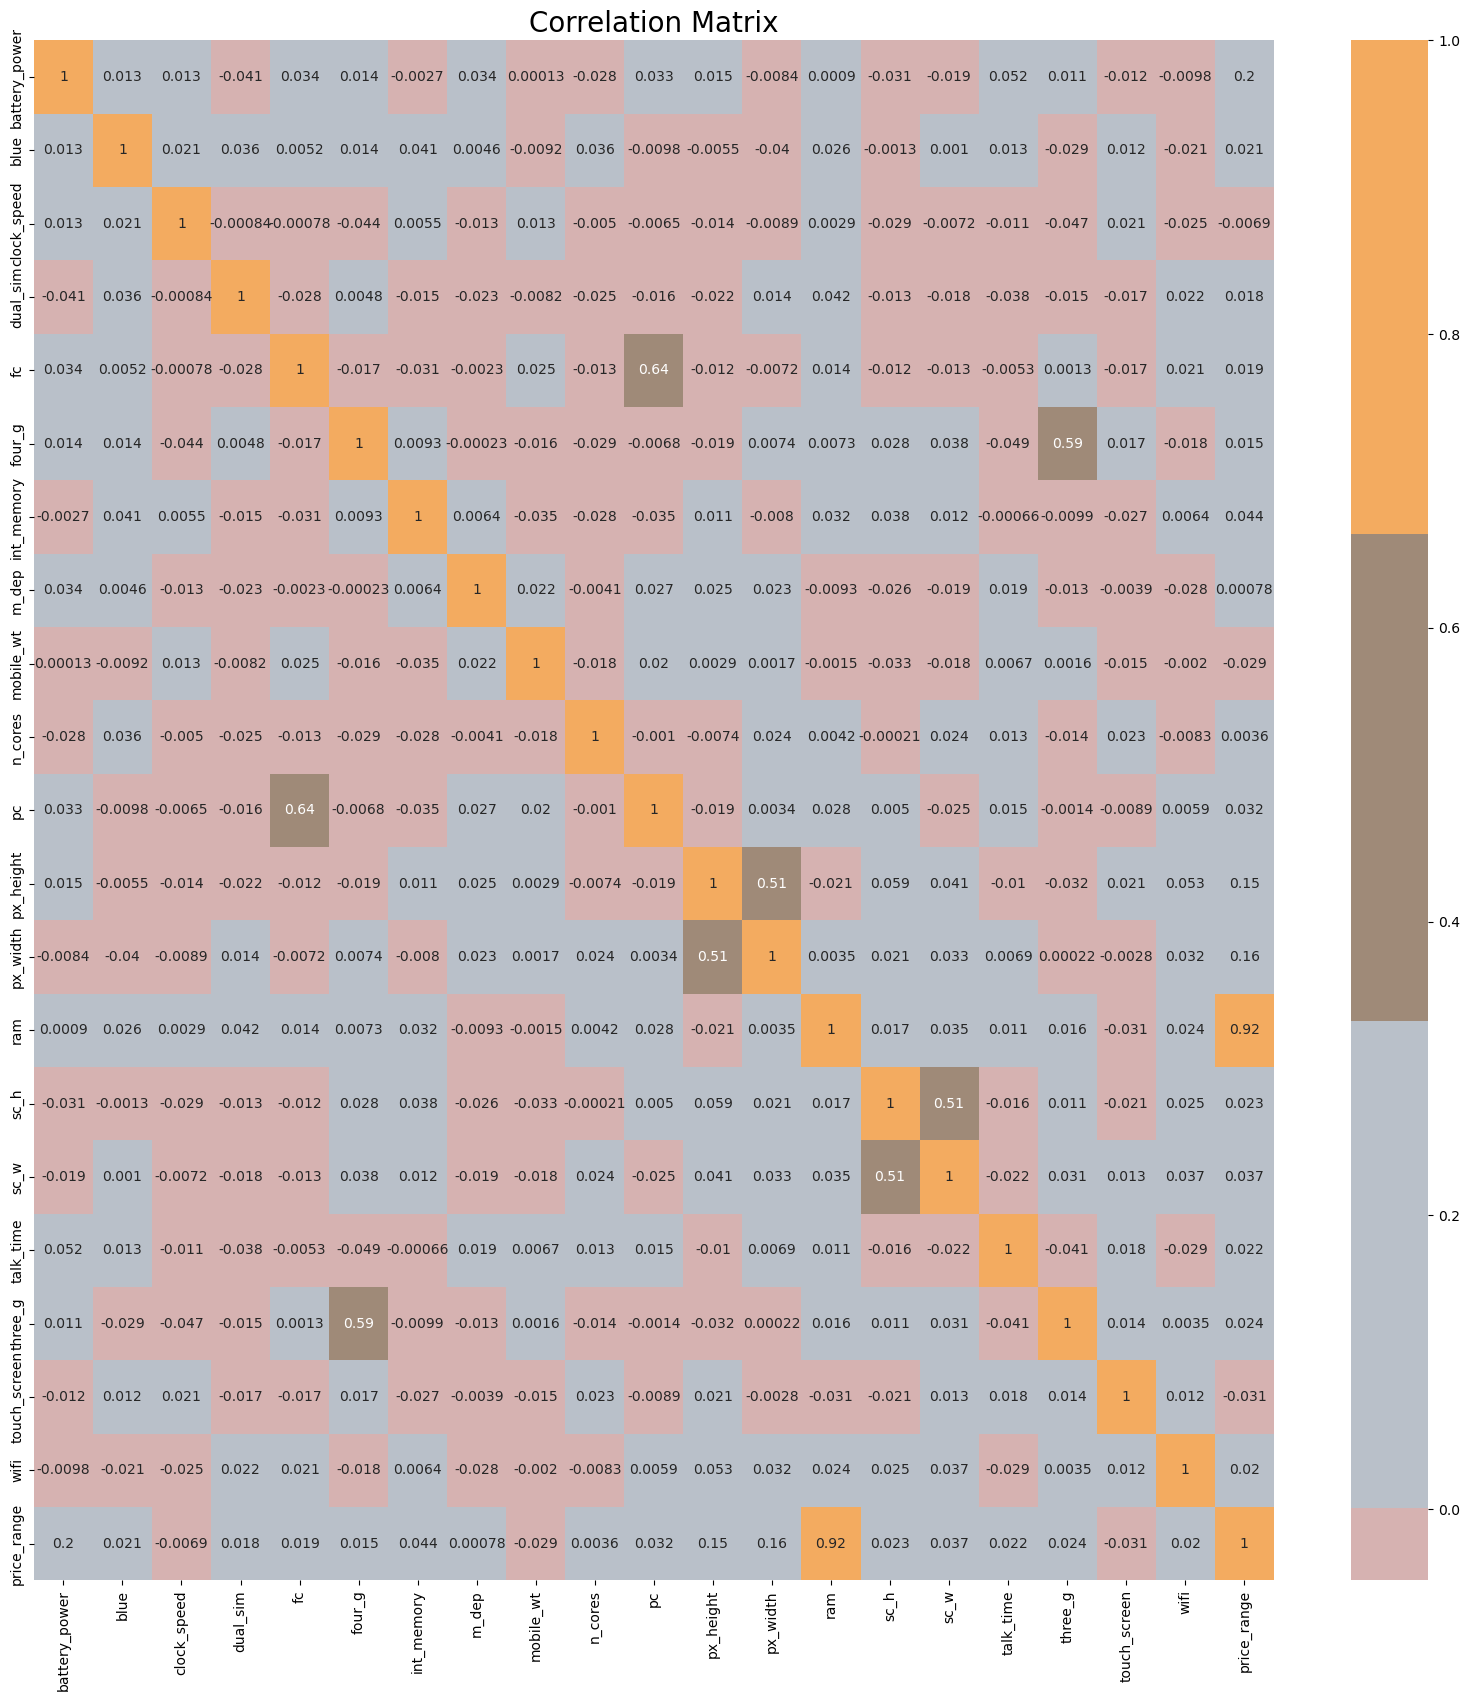

In [25]:
# Set up colors preferences
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

# Correlation matrix plot
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0)
plt.title ('Correlation Matrix', fontsize = 20)

In [8]:
print(df_cleaned.corrwith(df_cleaned['price_range']))

battery_power    0.202652
blue             0.020846
clock_speed     -0.006926
dual_sim         0.018153
fc               0.019327
four_g           0.014572
int_memory       0.043861
m_dep            0.000776
mobile_wt       -0.028663
n_cores          0.003573
pc               0.031831
px_height        0.147946
px_width         0.164763
ram              0.917131
sc_h             0.023067
sc_w             0.037330
talk_time        0.022085
three_g          0.023771
touch_screen    -0.031155
wifi             0.020394
price_range      1.000000
dtype: float64


__Comment on the selected variables:__

Based on the correlation coefficients between the target variable (_price_range_) and other variables in the dataset, we can justify our selection and focus on the most strongly correlated variables related to the mobile phone price.

We decided to choose the following variables: ram, px_width, px_height, battery_power.

- _ram_ (0.917131): This has the highest correlation with the price range, indicating that the price range typically increases as RAM increases. This aligns with the expectation that higher performance (enabled by more RAM) leads to a higher price.

- _px_width_ (0.164763) and _px_height_ (0.147946): Both of these, which indicate screen resolution, display a moderately positive correlation with the price range. This suggests that phones with higher resolution screens tend to be in higher price ranges, most likely since better display quality is highly valued.

- _battery_power_ (0.202652): This also shows a moderate positive correlation, suggesting that phones with higher battery capacities may be priced higher due to longer usage.


### 3. Split the dataset

In [9]:
# Split the dataset into training (80%) and testing data (20%) and use random_state = 142
train, test = train_test_split(df_cleaned, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(1596, 21)
(399, 21)


### 4. Train a logistic regression model & Evaluate the performance

#### 4.1 Normalize features and prepare input data

In [10]:
# Prepare input data and targets for building prediction model
selected_features = ['ram', 'px_width', 'px_height', 'battery_power']

X_train = train[selected_features]
y_train = train['price_range']
X_test = test[selected_features]
y_test = test['price_range']

- Since our features might be measured in different units that can influence our model results -> Normalize features
- We will fit "StandardScaler" only on the training data, then transform both the training and test data to avoid information leakage 

In [11]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaling parameters computed on the training data
X_test_scaled = scaler.transform(X_test)

In [12]:
print("X_train_scaled shape: ", X_train_scaled.shape)
print("y_train shape: ", y_train.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)
print("y_test shape: ", y_test.shape)

X_train_scaled shape:  (1596, 4)
y_train shape:  (1596,)
X_test_scaled shape:  (399, 4)
y_test shape:  (399,)


#### 4.2 Train a logistic regression model

In [13]:
# Train our Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [14]:
# Make predictions on training and testing set
y_hat_train = logistic_model.predict(X_train_scaled)
y_hat_test = logistic_model.predict(X_test_scaled)

#### 4.3 Evaluate the performance

In [15]:
# Evaluate the performance of our trained model
print("Accuracy score on training set: %.2f %%" %(100*accuracy_score(y_train, y_hat_train)))
print("Accuracy score on testing set: %.2f %%" %(100*accuracy_score(y_test, y_hat_test)))

Accuracy score on training set: 95.68 %
Accuracy score on testing set: 96.74 %


__Comment on Accuracy score results:__
- Based on the accuracy scores obtained from the training and test sets, it is evident that the model's performance is good. 
- Furthermore, the accuracy scores for the training and testing sets have a small gap. The model is performing slightly better on the test set than on the training set, which is a good sign and there is no overfitting in the model.

__The good performance of the model can be attributed to various contributing factors:__

- Firstly, the selected features exhibit a strong correlation with the target variable 'price_range.' For instance, the 'ram' variable has a correlation of approximately 0.92, indicating that 'ram' is a robust predictor of 'price_range'. 

- Moreover, the quality of the data can also impact the model's performance. Once the initial preparation steps have been taken, clean and well-prepared data enables the Logistic Regression model to learn more effectively and accurately predict outcomes both on the training and test set.

In [16]:
# Check confusion matrix
print("Confusion matrix on training set: ")
print(confusion_matrix(y_train, y_hat_train))


print("\n----------------------------------------\n")

print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_hat_test))

Confusion matrix on training set: 
[[396  11   0   0]
 [  9 372   8   0]
 [  0  11 373  13]
 [  0   0  17 386]]

----------------------------------------

Confusion matrix on test set: 
[[ 91   1   0   0]
 [  1 106   2   0]
 [  0   6  96   0]
 [  0   0   3  93]]


In [17]:
## Precision
print("Precision on training set: ", precision_score(y_train, y_hat_train, average='weighted'))
print("Precision on testing set: ", precision_score(y_test, y_hat_test, average='weighted'))

print("\n----------------------------------------\n")

## Sensitivity (Recall)
print("Recall on training set: ", recall_score(y_train, y_hat_train, average='weighted'))
print("Recall on testing set: ", recall_score(y_test, y_hat_test, average='weighted'))

print("\n----------------------------------------\n")

## F1-score
print("F1-score on training set: ", f1_score(y_train, y_hat_train, average='weighted'))
print("F1-score on testing set: ", f1_score(y_test, y_hat_test, average='weighted'))

Precision on training set:  0.9568716990154322
Precision on testing set:  0.967915495388783

----------------------------------------

Recall on training set:  0.956766917293233
Recall on testing set:  0.9674185463659147

----------------------------------------

F1-score on training set:  0.9568019393317087
F1-score on testing set:  0.9675167593238633


__The model's performance metrics, including Precision, Recall, and F1-score, have consistently high values for both the training and testing sets.__

- Precision and Recall are around 95.6% and 96.5%, showcasing the model's ability to generalize effectively to unseen data. There is little discrepancy in performance when comparing these metrics between the training and testing sets.

- The high Precision emphasizes the model's accuracy in predicting a specific class, thus reducing the number of false positives. Conversely, the Recall measures how good the model is at predicting positives. A high value for the Recall means that the model can identify all relevant instances and minimize false negatives as well.

- As for the F1-score, this metric of a balance between precision and recall maintains a high value, which can infer that the model has a good performance in general.

### 5. Train a KNN model & Calculate the accuracy scores

In [18]:
# Define an arbitrary K value
K = 3 

# Create and training a KNN classifier model
knn_model = KNeighborsClassifier(n_neighbors = K)

# Use k-fold (k=10) cross validation for testing accuracy estimation
scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.2f %% +- %.2f %%' % (scores.mean() * 100, scores.std() * 100))

print("\n----------------------------------------\n")

# Train the model using the training set
knn_model.fit(X_train_scaled, y_train)

# Use the KNN model to make predictions on training and testing data
y_pred_train = knn_model.predict(X_train_scaled)
y_pred_test = knn_model.predict(X_test_scaled)

# Evaluate the performance of the KNN model
print(f'The trained KNN model is performed with K = {K}')
print("Accuracy score on training set: %.2f %%" %(100*accuracy_score(y_train, y_pred_train)))
print("Accuracy score on testing set: %.2f %%" %(100*accuracy_score(y_test, y_pred_test)))

Accuracy for each round: 
 [0.86875    0.8625     0.90625    0.90625    0.90625    0.90625
 0.85534591 0.89308176 0.89308176 0.89308176]
Average accuracy: 88.91 % +- 1.87 %

----------------------------------------

The trained KNN model is performed with K = 3
Accuracy score on training set: 95.49 %
Accuracy score on testing set: 85.96 %


__Comment on the initial KNN model based on the arbitrary K value:__
- The 10-fold cross-validation results show that the model's performance varies across different subsets of the training data, with accuracy scores ranging from approximately 86.25% to 90.63%. This variation indicates that the model is sensitive to the specific choice of training data, which could be a sign of potential overfitting.
- By setting K = 3 in an ad-hoc manner in this step, we got the accuracy scores for the training and testing sets of 95.49% and 85.96%, respectively.
- We can easily see that the model's accuracy on the training set is higher than that of the testing set, which could indicate a performance drop when moving from the training data to the unseen test data.
- The discrepancy of around 9.53% suggests that our KNN model with the given K = 3 might be confronted with the overfitting issue on the training data.
- This result aligns with the principle that for K-Nearest Neighbors (KNN) models, overfitting is a concern when the value of K is too small, given our currently employed K = 3, which might fall within the range considered small for KNN models.

In next steps, we will try to address overfitting and improve the model's performance through tuning the hyper-parameter K using GridSearchCV.

### 6. Tune the hyper-parameter K in KNN & Visualize the results

#### 6.1 Tune the hyper-parameter K in KNN using GridSearchCV

In [19]:
# Define search space for parameters K
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X_train_scaled, y_train)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('Best accuracy score: %.2f %%' %(100*clf.best_score_))

Best K value:  11
Best accuracy score: 90.29 %


#### 6.2 Visualize and explain the results

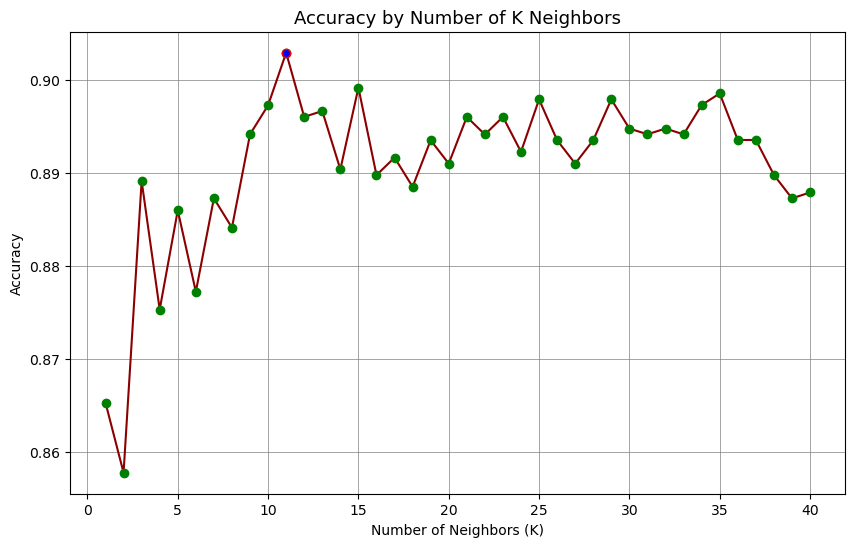

In [28]:
# Visualize the results
results = clf.cv_results_ # Get the results of the grid search

# Create a figure plot with some preferences 
plt.figure(figsize=(10, 6), facecolor='white')
plt.gca().set_facecolor('white')
plt.xlabel('Number of Neighbors (K)') # Set the labels of the x and y axes
plt.ylabel('Accuracy')
plt.grid(True, which='both', color='grey', linewidth=0.5) # Add grid lines

# Plot the mean test scores as the main line graph
plt.plot(range(1, 41), results['mean_test_score'], marker='o', color='darkred', markerfacecolor='green', markeredgecolor='green')

# Highlight the data point for the optimal K=11 
plt.scatter(11, results['mean_test_score'][10], color='blue', edgecolor='red', zorder=5)

# Show the plot
plt.title("Accuracy by Number of K Neighbors", fontsize =13)
plt.show()

#### 6.3 Train the final KNN model based on the optimal value for K

In [21]:
# Get the best K value from GridSearchCV
best_k = clf.best_params_['n_neighbors']

# Create and train the final KNN classifier model with the best K value
knn_final_model = KNeighborsClassifier(n_neighbors = best_k)
knn_final_model.fit(X_train_scaled, y_train)

# Use the final KNN model to make predictions on the normalized testing data
y_pred_test_final = knn_final_model.predict(X_test_scaled)

# Evaluate the performance of the final KNN model on the test set
print("The final model's accuracy score on testing set: %.2f %%" %(100*accuracy_score(y_test, y_pred_test_final)))

The final model's accuracy score on testing set: 90.48 %


__Comment on how K influences the prediction performance:__

- The number of neighbours, K, in KNN is a hyperparameter that determines the number of nearest neighbours to consider when making a prediction.

- With an initial K value of 3, the model achieved a performance of 85.96%.
- By adopting the optimal K value of 11 through GridSearchCV, the final model's performance improved to 90.48%.

- A small K value is likely to cause the model to memorize noise and specific patterns in the training data, leading to overfitting. Conversely, a large K value can make the model more resilient to noise but potentially less accurate in its predictions (or underfitting).

- In other words, the choice of K directly impacts the model's performance. An inappropriate K value can cause the model to overfit or underfit, both of which lead to poor performance on unseen data.

- Therefore, we should aim to find the optimal K value that strikes a balance between these considerations. This optimal value can be determined using the automatic tuning algorithm GridSearchCV.